<a href="https://colab.research.google.com/github/shreyaa-chax05/spam-detection-nlp/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow_hub as hub

## Read the dataset

In [ ]:
df=pd.read_csv("/content/spam dataset.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df= df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df= df.rename(columns={'v1':'label','v2':'text'})
df['label_enc']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Train Test Split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(df['text'], df['label_enc'], test_size= 0.2, random_state=42)
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
avg_words_len = round(sum([len(i.split()) for i in df['text']])/len(df['text']))
total_words_len= len(set("".join(df['text']).split()))
print(f"Data Loaded. Training samples: {len(x_train_np)}")
print(f"Average words per message: {avg_words_len}")
print(f"Approximate vocabulary size: {total_words_len}")

Data Loaded. Training samples: 4457
Average words per message: 16
Approximate vocabulary size: 18392


## Using ANN

In [ ]:
def compile_and_fit(model, epochs=5):
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history= model.fit(x_train_np, y_train_np, epochs= epochs, validation_data=(x_test_np, y_test_np))
  return history
def get_metrics(model,x,y):
  y_preds= np.round(model.predict(x))
  return { 'accuracy': accuracy_score(y, y_preds), 'precision': precision_score(y, y_preds), 'recall': recall_score(y, y_preds), 'f1.score': f1_score(y, y_preds)}

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vec= TextVectorization(max_tokens=total_words_len, standardize='lower_and_strip_punctuation', output_mode='int', output_sequence_length=avg_words_len)
text_vec.adapt(x_train_np)

In [ ]:
input_layer = layers.Input( shape=(1,),dtype=tf.string)
x= text_vec(input_layer)
x= layers.Embedding(input_dim=total_words_len, output_dim= 128)(x)
x= layers.GlobalAveragePooling1D()(x)
x= layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1= keras.Model( input_layer, output_layer, name= 'Dense_Model')
history_1 = compile_and_fit(model_1)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8625 - loss: 0.3879 - val_accuracy: 0.9587 - val_loss: 0.1495
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9763 - loss: 0.1096 - val_accuracy: 0.9749 - val_loss: 0.0777
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9866 - loss: 0.0434 - val_accuracy: 0.9785 - val_loss: 0.0679
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9922 - loss: 0.0279 - val_accuracy: 0.9776 - val_loss: 0.0659
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9980 - loss: 0.0126 - val_accuracy: 0.9785 - val_loss: 0.0648


In [ ]:
input_layer = layers.Input( shape=(1,), dtype=tf.string)
x = text_vec(input_layer)
x = layers.Embedding(input_dim=total_words_len, output_dim=128)(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(32, activation='relu')(x); output_layer = layers.Dense(1, activation='sigmoid')(x)
model_2= keras.Model( input_layer, output_layer, name="BiLSTM_Model")
history_2= compile_and_fit(model_2)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.8885 - loss: 0.2806 - val_accuracy: 0.9695 - val_loss: 0.0919
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9904 - loss: 0.0419 - val_accuracy: 0.9740 - val_loss: 0.0857
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9963 - loss: 0.0183 - val_accuracy: 0.9776 - val_loss: 0.0812
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9776 - val_loss: 0.1076
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 1.0000 - loss: 6.2993e-04 - val_accuracy: 0.9812 - val_loss: 0.1103


In [ ]:
use_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    trainable=False,
    input_shape=[],
    dtype=tf.string,
    name='USE'
)
input_layer = layers.Input(shape=[], dtype=tf.string)
embedding = layers.Lambda(lambda x: use_layer(
    x), output_shape=(512,))(input_layer)
x = layers.Dense(64, activation='relu')(embedding)
x = layers.Dropout(0.2)(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_3 = keras.Model(input_layer, output_layer, name="USE_Model")
history_3 = compile_and_fit(model_3)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8535 - loss: 0.4638 - val_accuracy: 0.9713 - val_loss: 0.1166
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9766 - loss: 0.0971 - val_accuracy: 0.9758 - val_loss: 0.0728
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9868 - loss: 0.0543 - val_accuracy: 0.9821 - val_loss: 0.0602
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9900 - loss: 0.0432 - val_accuracy: 0.9848 - val_loss: 0.0557
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9901 - loss: 0.0391 - val_accuracy: 0.9839 - val_loss: 0.0536


In [ ]:
results= {'Dense Embedding': get_metrics(model_1, x_test_np, y_test_np),'Bi-LSTM': get_metrics(model_2, x_test_np, y_test_np), 'Transfer Learning (USE)': get_metrics(model_3, x_test_np, y_test_np)}
results_df= pd.DataFrame(results).transpose()
print("Performance Table:")
print(results_df)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Performance Table:
                         accuracy  precision    recall  f1.score
Dense Embedding          0.978475   0.956204  0.879195  0.916084
Bi-LSTM                  0.981166   0.932432  0.926174  0.929293
Transfer Learning (USE)  0.983857   0.951724  0.926174  0.938776


## Graphical Representation

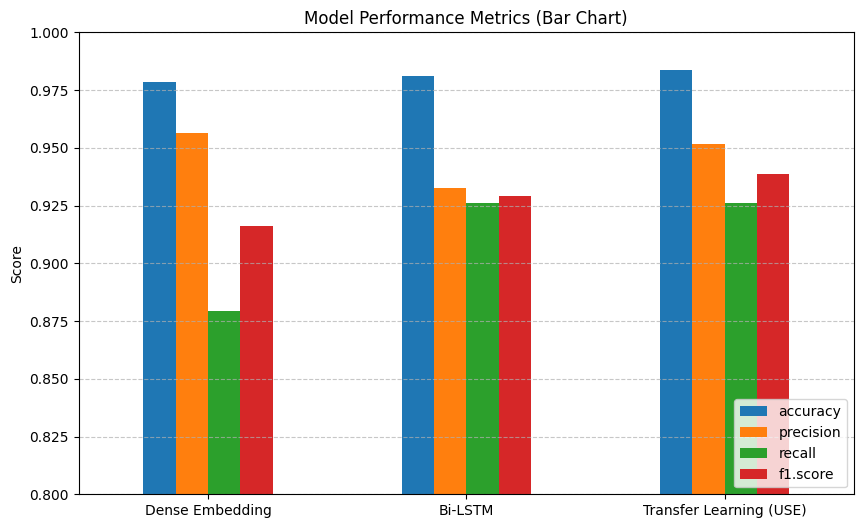

In [ ]:
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Metrics (Bar Chart)")
plt.ylabel("Score")
plt.ylim(0.8,1.0)
plt.xticks( rotation=0)
plt.legend( loc='lower right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

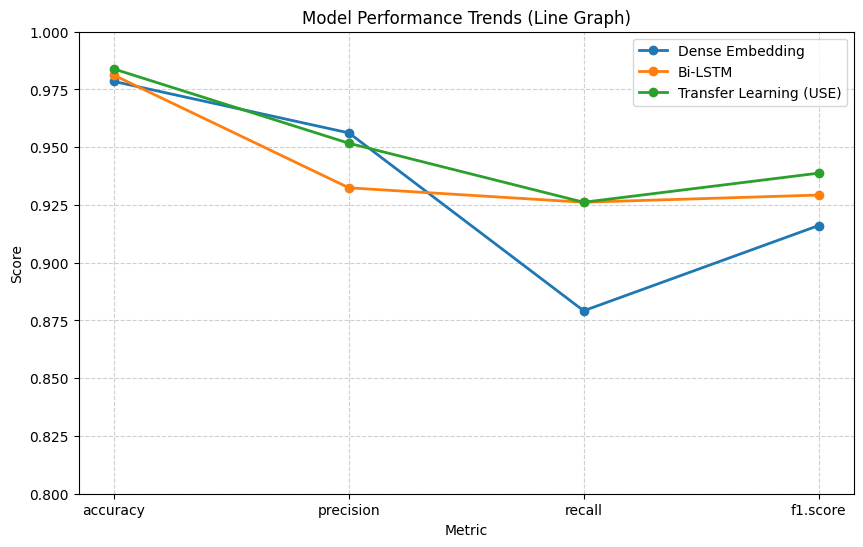

In [ ]:
plt.figure(figsize=(10,6))
for model_name in results_df.index:
  plt.plot(results_df.columns, results_df.loc[model_name], marker='o',label=model_name, linewidth=2)
plt.title("Model Performance Trends (Line Graph)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0.8,1.0)
plt.grid(True, linestyle='--',alpha=0.6)
plt.legend()
plt.show()